Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Using test image: /Users/juan/Desktop/Acne Project/acne-classification-app/ml/data/raw/SkinDisease/Train/Acne/152__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.jpeg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


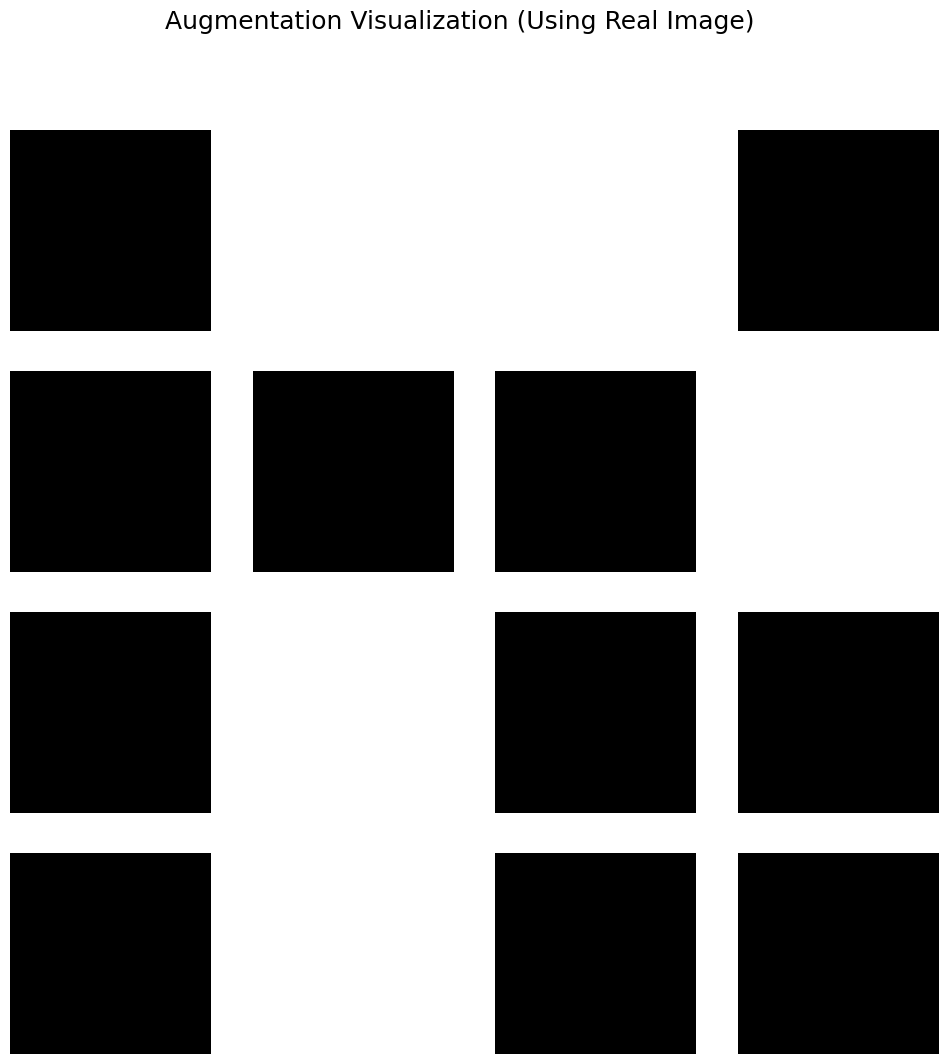

In [13]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from augmentation import get_acne_augmentation_model

# The folder you listed
root = "/Users/juan/Desktop/Acne Project/acne-classification-app/ml/data/raw/SkinDisease/Train/Acne"

# Pick a real file from the folder
filename = os.listdir(root)[0]  # first file in the Acne folder
TEST_IMAGE = os.path.join(root, filename)

print("Using test image:", TEST_IMAGE)

# Load + decode image
img = tf.io.read_file(TEST_IMAGE)
img = tf.image.decode_image(img, channels=3)
img = tf.image.convert_image_dtype(img, tf.float32)
img = tf.image.resize(img, (224, 224))

# Load augmentation model
aug = get_acne_augmentation_model()

plt.figure(figsize=(12, 12))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(aug(img, training=True))
    plt.axis("off")

plt.suptitle("Augmentation Visualization (Using Real Image)", fontsize=18)
plt.show()


2025-11-22 12:36:54.746473: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:17: Filling up shuffle buffer (this may take a while): 5206 of 12515
2025-11-22 12:37:04.787899: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:17: Filling up shuffle buffer (this may take a while): 9119 of 12515
2025-11-22 12:37:24.735413: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:17: Filling up shuffle buffer (this may take a while): 11502 of 12515
2025-11-22 12:37:29.658360: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/Users/juan/Library/Python/3.12/lib/python/s

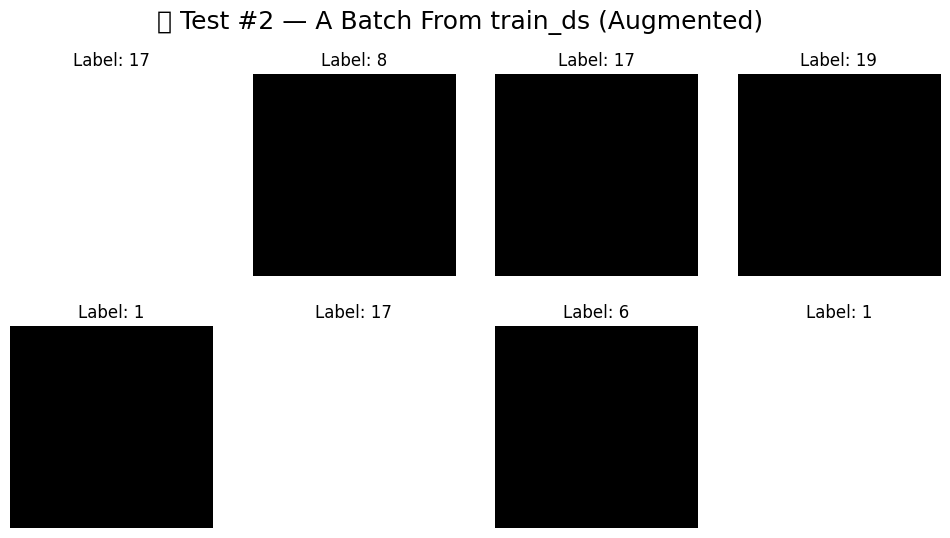

In [14]:
from dataset import get_datasets

train_ds, val_ds, test_ds = get_datasets(batch_size=8)

# Take one batch
images, labels = next(iter(train_ds))

plt.figure(figsize=(12, 6))
for i in range(8):
    ax = plt.subplot(2, 4, i + 1)
    plt.imshow(images[i])
    plt.title(f"Label: {labels[i].numpy()}")
    plt.axis("off")

plt.suptitle("🔍 Test #2 — A Batch From train_ds (Augmented)", fontsize=18)
plt.show()


2025-11-22 12:37:42.452246: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:17: Filling up shuffle buffer (this may take a while): 4275 of 12515
2025-11-22 12:37:52.618111: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:17: Filling up shuffle buffer (this may take a while): 9006 of 12515
2025-11-22 12:38:12.491276: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:17: Filling up shuffle buffer (this may take a while): 11113 of 12515
2025-11-22 12:38:15.726056: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


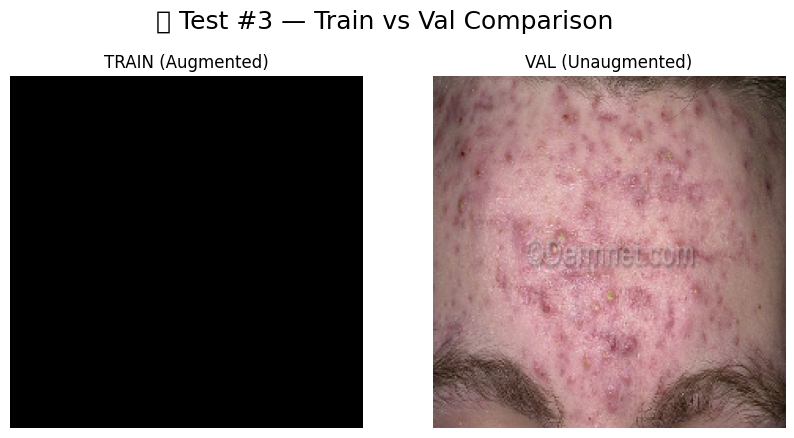

In [15]:
# Grab 1 image from train_ds
train_images, train_labels = next(iter(train_ds))

# Grab 1 image from val_ds
val_images, val_labels = next(iter(val_ds))

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(train_images[0])
plt.title("TRAIN (Augmented)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(val_images[0])
plt.title("VAL (Unaugmented)")
plt.axis("off")

plt.suptitle("🔍 Test #3 — Train vs Val Comparison", fontsize=18)
plt.show()


In [16]:
import numpy as np

print("🔎 Test #4 — Pipeline Integrity Check\n")

# Check batch shapes
print("Train batch shape:", train_images.shape)
print("Val batch shape:  ", val_images.shape)

# Check datatype
print("Train dtype:", train_images.dtype)
print("Val dtype:  ", val_images.dtype)

# Check value range
print("Train min/max:", np.min(train_images), np.max(train_images))
print("Val min/max:  ", np.min(val_images), np.max(val_images))

# Check label shapes
print("Train labels shape:", train_labels.shape)
print("Val labels shape:  ", val_labels.shape)

print("\nIf all shapes, dtypes, and ranges look correct, the pipeline is healthy!")


🔎 Test #4 — Pipeline Integrity Check

Train batch shape: (8, 224, 224, 3)
Val batch shape:   (8, 224, 224, 3)
Train dtype: <dtype: 'float32'>
Val dtype:   <dtype: 'float32'>
Train min/max: 0.0 23.707212
Val min/max:   0.0 1.0
Train labels shape: (8,)
Val labels shape:   (8,)

If all shapes, dtypes, and ranges look correct, the pipeline is healthy!
